## Building a Recommender System

## Objective:

### I want to build a movie recommender system.

- The recommender system should suggest a catalogue of movies for the user to watch.
- User should be able to make a profile, where the app tries to understand the users likings and dislikings.  

### Mandatory Features  

    - User Should be able to pick favourite genres.
    - User Should be able to pick favourite movies.
    - User Should be able to rate favourite movies.  
    
### Optional Features   

    - Profile Creation using feedback. The feedback about movies falls into one of two categories:
        - Explicit— users specify how much they liked a particular movie by providing a numerical rating.
        - Implicit— if a user watches a movie, the system infers that the user is interested.
    - The model should be able to make "Cold Start" Recommendations, that is, 
        - New users still receive recommendations. 
        - Movies that are not very famous should be able to be recommended proportionally.  
        
### The recommendations should be made of two types.  

    - Home Page Recommendations.
        This is the catalogue that the user will see immediately when he opens the app.
    - Query Related Recommendations.
        This is the catalogue that the user will see when he searches through keywords (like movie names and genres).
        
### Evaluation
    - Evaluations can be of many types for a recommender system, some are designed to maximise the watch time of users on a particular website, some are designed to maximise clicks on the website, while some are designed to maximise engagement.  
    
    - For this project, my priority will be maximising engagement in the least amount possible,  
    That is, user should find a movie he is interested in after browsing the smallest possible catalogue.


## Dataset:

I will be using the [MovieLens](https://grouplens.org/datasets/movielens/) dataset for this purpose.
I have decided to use the mini dataset for faster model training and evaluation but I do plan to use the full dataset once I am happy with the performance on smaller dataset.


The data set consists of 4 csv files named links, movies,ratings and tags
  - ratings.csv 
      - all ratings contained in the file ratings.csv
      - ratings made from 0-5 with 0.5 incrementation
      - ratings have attached user ID's with each rating.
      - each rating contains an attached timestamp signifying that represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
  - tags.csv 
      - contains all the tags given by user.
      - contains user ID along with every tag.
      - contains timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
  - movies.csv 
      - contains information about movie titles.
      - movie gneres associated with the movie.
      - along with release year of the movie.
  - links.csv 
      - contains identifiers that can be used to link other sources of movies data
      - movieId - identifier movieLens
      - imdbId - identifier imdb 
      - tmdbId - identifier  theMovieDb

This data set describes a 5 - star rating and free-text tagging activity from MovieLens(a movie recommender service)
100836 ratings
3683 tag applications
9742 movies
users involed in creation = 610
duration of collection of data - March 29, 1996 - September 24, 2018
every user rated atleaset 20 ratings

## Tech Stack
- Data Exploration 
    - Python 3.10
    - Pandas
    - Numpy
- Data Cleaning & Preprocessing
    - Python 3.10
    - Pandas
    - Numpy
    - Regular Expression
    - TextBlob
- Data Visualization
    - Python 3.10
    - Pandas
    - Matplotlib
    - Seaborn
    - Plotly
- Recommender Model
    - Python 3.10
    - SciKit Learn
    - Tensorflow
- API & UI
    - To be Decided

### Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import textblob

pd.options.display.max_rows = 30
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_columns = 100
pd.options.display.width = 10000

%matplotlib inline

## Importing Dataset

In [2]:
movies_df = pd.read_csv('data_movielens/movies.csv')
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [3]:
links_df = pd.read_csv('data_movielens/links.csv')
links_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [4]:
ratings_df = pd.read_csv('data_movielens/ratings.csv')
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [5]:
tags_df = pd.read_csv('data_movielens/tags.csv')
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


## Data Exploration & Preprocessing

### Movies Dataframe

In [6]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Data Cleaning & Preprocessing
1. Extract Release Year
2. Extract Genres and store in One Hot Encoding

1. Release Year

In [7]:
weird_movieID = set([])
for idx in range(movies_df.shape[0]):
    if movies_df.loc[idx,'title'].count('(') != 1 :
        weird_movieID.add(idx)
    elif movies_df.loc[idx,'title'].count(')') != 1 :
        weird_movieID.add(idx)

In [8]:
movies_df.loc[weird_movieID]

C:\Users\Kartikeya\AppData\Local\Temp\ipykernel_15280\3128902862.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  movies_df.loc[weird_movieID]


,movieId,title,genres
2052,2731,"400 Blows, The (Les quatre cents coups) (1959)",Crime|Drama
2053,2732,Jules and Jim (Jules et Jim) (1961),Drama|Romance
4101,5878,Talk to Her (Hable con Ella) (2002),Drama|Romance
4102,5879,Eight Crazy Nights (Adam Sandler's Eight Crazy...,Animation|Comedy|Musical
8196,103235,"Best Offer, The (Migliore offerta, La) (2013)",Thriller
...,...,...,...
8180,102984,Inhuman Resources (Redd Inc.) (2012),Horror|Thriller
2038,2716,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi
4086,5839,My Father's Glory (La gloire de mon père) (1990),Adventure|Drama
4091,5849,I'm Starting From Three (Ricomincio da Tre) (1...,Comedy


In [9]:
# Separting movie title and year part using split function.
split_values = movies_df['title'].str.rsplit("(", n = 1, expand = True)
# setting 'movie_title' values to title part.
movies_df.title = split_values[0]
# creating 'release_year' column.
movies_df['release_year'] = split_values[1]
# Cleaning the release_year series.
movies_df['release_year'] = movies_df.release_year.str[0:4]

In [10]:
movies_df.head()

,movieId,title,genres,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


2. Extract Genres and Encode using One Hot Encoding

In [11]:
# Getting series of lists by applying split operation.
movies_df.genres = movies_df.genres.str.split('|')
# Getting distinct genre types for generating columns of genre type, set stores only distinct values
genre_columns = list(set([j for i in movies_df['genres'].tolist() for j in i]))
genre_columns

['Horror',
 'Crime',
 'Sci-Fi',
 'Western',
 'Romance',
 'Comedy',
 'Documentary',
 'Film-Noir',
 'Action',
 'Thriller',
 'Musical',
 'Adventure',
 'Fantasy',
 'IMAX',
 'Animation',
 'Drama',
 'Children',
 'War',
 'Mystery',
 '(no genres listed)']

In [12]:
## No need for these columns
genre_columns.remove('(no genres listed)')
genre_columns.remove('IMAX')

In [13]:
#We are trying to one-hot encode the movies genre
for j in genre_columns:
    movies_df[j] = 0
movies_df.head()

,movieId,title,genres,release_year,Horror,Crime,Sci-Fi,Western,Romance,Comedy,Documentary,Film-Noir,Action,Thriller,Musical,Adventure,Fantasy,Animation,Drama,Children,War,Mystery
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II,[Comedy],1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
#If the genre is in the list we made in genres column then one-hot the respective genre column
for i in range(movies_df.shape[0]):
    for j in genre_columns:
        if(j in movies_df['genres'].iloc[i]):
            movies_df.loc[i,j] = 1
        else:
            movies_df.loc[i,j] = 0

In [15]:
#make sure everything worked fine and set columns as integer value
movies_df.iloc[:,4:] = movies_df.iloc[:,4:].astype(int)
movies_df.head()

,movieId,title,genres,release_year,Horror,Crime,Sci-Fi,Western,Romance,Comedy,Documentary,Film-Noir,Action,Thriller,Musical,Adventure,Fantasy,Animation,Drama,Children,War,Mystery
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,1,0,0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
4,5,Father of the Bride Part II,[Comedy],1995,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


### Missing Values

In [16]:
movies_df.isna().sum(axis=0)

movieId          0
title            0
genres           0
release_year    12
Horror           0
Crime            0
Sci-Fi           0
Western          0
Romance          0
Comedy           0
Documentary      0
Film-Noir        0
Action           0
Thriller         0
Musical          0
Adventure        0
Fantasy          0
Animation        0
Drama            0
Children         0
War              0
Mystery          0
dtype: int64

In [17]:
## To handle missing values, release year must be converted to int
## Set the missing year values as -1 first
movies_df.loc[movies_df.isna()['release_year'],'release_year'] = -1

## Now, convert column to integer values
movies_df['release_year'] = movies_df['release_year'].astype(int)

## Now, replace with median
## Keep in mind, that -1 must NOT be considered while calculating median
year_imputer = movies_df.loc[movies_df['release_year'] != -1 , 'release_year'].median()
year_imputer = int(year_imputer)
movies_df.loc[movies_df['release_year'] == -1 , 'release_year'] = year_imputer 

In [43]:
movies_df.drop(columns=['genres'],inplace=True)

## Links Dataframe

In [18]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.000
1,2,113497,8844.000
2,3,113228,15602.000
3,4,114885,31357.000
4,5,113041,11862.000


### Missing Values

In [19]:
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [20]:
## I can not drop these directly from dataframe just yet because I have to merge the dataframes
## I will make a memory of the IDs for future
dropped_links_movieid = links_df[links_df.isna()['tmdbId']]['movieId']
links_df.dropna(axis=0,inplace=True)

## Ratings Dataframe

In [21]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.000,964982703
1,1,3,4.000,964981247
2,1,6,4.000,964982224
3,1,47,5.000,964983815
4,1,50,5.000,964982931


### Missing Values

In [22]:
ratings_df.isna().sum(axis=0)

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

## Tags Dataframe

In [23]:
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


### Data Cleaning

In [24]:
tags_df['tag'] = tags_df.tag.str.lower()

In [25]:
for i,j in tags_df.iterrows():
    tag = j.tag
    tag_correct = re.sub(r' \([^)]*\)','',tag)
    if 'based' or '-' in tag_correct:
        tags_df.loc[i,'tag'] = tag_correct
        continue
    if re.findall(r'\b\w{2}\b',tag_correct) or re.findall(r'\b\w{1}\b',tag_correct):
        tags_df.loc[i,'tag'] = np.NaN
    elif tag == tag_correct:
        continue
    else:
        tags_df.loc[i,'tag'] = tag_correct
        pass

tags_df = tags_df.dropna()     

In [26]:
tags_df.head(10)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,boxing story,1445715207
4,2,89774,mma,1445715200
5,2,89774,tom hardy,1445715205
6,2,106782,drugs,1445715054
7,2,106782,leonardo dicaprio,1445715051
8,2,106782,martin scorsese,1445715056
9,7,48516,way too long,1169687325


In [38]:
tags_df.drop(columns=['timestamp'],inplace=True)

### Missing Values

In [27]:
tags_df.isna().sum(axis=0)

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

## Data Visualization

<AxesSubplot:>

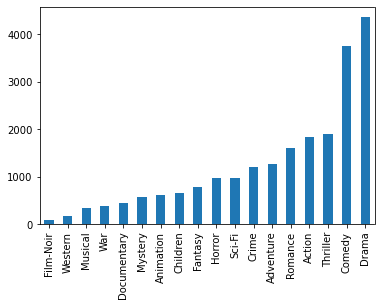

In [28]:
genre_counts = movies_df.iloc[:,4:].sum(axis=0).sort_values()
genre_counts.plot(kind='bar')

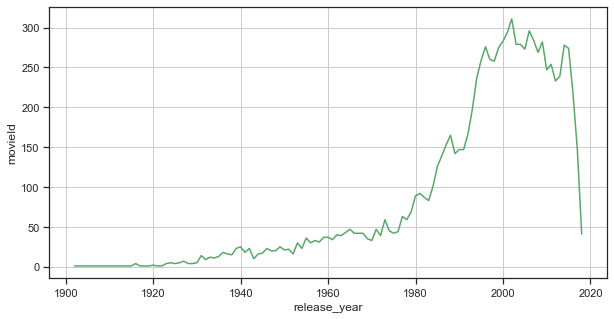

In [29]:
plt.rcParams["figure.figsize"] = (10,5)
dftmp = movies_df[['movieId', 'release_year']].groupby('release_year')
sns.set(style="ticks")
sns.lineplot(x = dftmp.release_year.first(), y = dftmp.movieId.nunique(),markers='o',color='g')
plt.grid()

## Merging Datasets

In [30]:
## Calculate Average Mean Ratings of Every Movie
movie_ratings = ratings_df.groupby(by ='movieId')['rating'].mean()

In [31]:
## Create a new Dataframe
mov_temp = movies_df[['movieId','title']]
rat_temp = movie_ratings
movies_ratings = mov_temp.merge(rat_temp, on='movieId' , how = 'left')
movies_ratings.head()

,movieId,title,rating
0,1,Toy Story,3.921
1,2,Jumanji,3.432
2,3,Grumpier Old Men,3.260
3,4,Waiting to Exhale,2.357
4,5,Father of the Bride Part II,3.071


<AxesSubplot:xlabel='rating', ylabel='Count'>

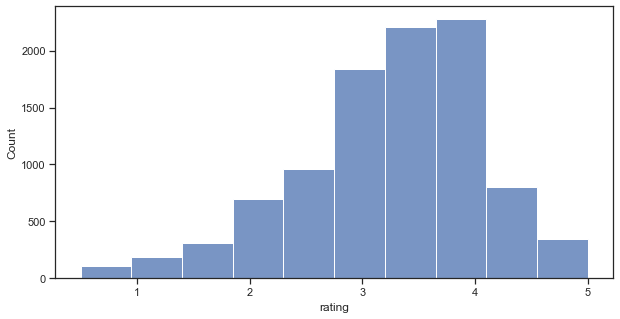

In [32]:
sns.histplot(data=movies_ratings['rating'],bins=10)

This looks normalized

In [33]:
movies_ratings['rating_cnt'] = 0
movie_ratings_cnt = ratings_df.groupby(by ='movieId')['rating'].count()

movies_ratings_cnt = mov_temp.merge(movie_ratings_cnt, on='movieId' , how = 'left')
movies_ratings_cnt.head()

movies_ratings['rating_cnt'] = movies_ratings_cnt['rating'].fillna(0).astype(int)
movies_ratings

,movieId,title,rating,rating_cnt
0,1,Toy Story,3.921,215
1,2,Jumanji,3.432,110
2,3,Grumpier Old Men,3.260,52
3,4,Waiting to Exhale,2.357,7
4,5,Father of the Bride Part II,3.071,49
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,4.000,1
9738,193583,No Game No Life: Zero,3.500,1
9739,193585,Flint,3.500,1
9740,193587,Bungo Stray Dogs: Dead Apple,3.500,1


<AxesSubplot:xlabel='rating_cnt', ylabel='Count'>

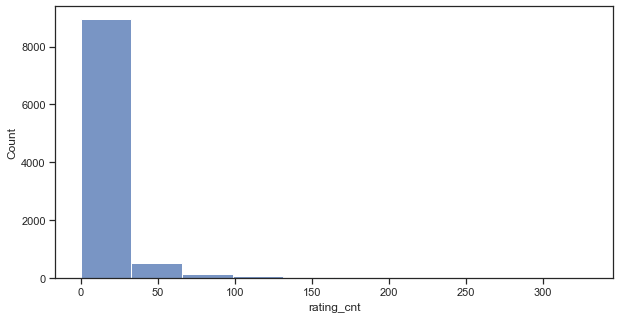

In [34]:
sns.histplot(data=movies_ratings['rating_cnt'],bins=10)

## Saving Dataframes

In [44]:
movies_df.to_csv('movie_genres.csv',index=False)
tags_df.to_csv('movie_tags.csv',index=False)